In [1]:
import numpy as np
import unicodecsv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baseball Pitchers and Salaries: How much is a pitcher worth?

Baseball is often considered the *sport for data nerds*. During a TV broadcast, there are so many mentions of different
statistics for just one player, it seems that they can talk about that individual for the entire game. However, teams 
use these statistics to determine the best mix of talent versus money spent.

One important position of a baseball team is the pitcher. A dominant pitcher can hide many flaws on a team, including
poor fielding and lackluster hitting. But, how does a team determine how much to pay a pitcher? What key statistics lead to a bigger salary for pitchers? Let us investigate.

In [2]:
#def read_csv(filename):
 #   with open (filename, 'rb') as f:
#     reader = unicodecsv.DictReader(f)
   #     return list(reader)

pitchers = pd.read_csv('Pitching.csv')
salaries = pd.read_csv('Salaries.csv')

PS = pitchers.merge(salaries, on=['playerID', 'lgID', 'teamID'], how='inner')

Before we begin, we must analyze the data set that we are using, to check for any missing information or outliers.

In [3]:
PS.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,yearID_x,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,HBP,BK,BFP,GF,R,SH,SF,GIDP,yearID_y,salary
count,51682.000000,51682.000000,51682.000000,51682.000000,51682.000000,51682.000000,51682.000000,51682.000000,51682.000000,51682.000000,...,51682.000000,51682.000000,51682.000000,51682.000000,51682.000000,26295.000000,26295.000000,1278.000000,51682.000000,5.168200e+04
mean,1999.568612,1.032023,6.091037,5.404241,33.295054,12.203611,1.064355,0.331295,3.372896,302.458864,...,3.102279,0.541214,428.125537,9.115398,48.009249,3.272866,2.652824,7.215962,2000.037711,2.229548e+06
std,9.027947,0.182749,5.392403,4.171821,20.048611,13.443994,2.370959,0.826338,9.194315,219.346600,...,3.110359,1.111555,305.004295,15.097995,34.921716,3.229308,2.407517,6.303744,8.676806,3.464342e+06
min,1966.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,0.000000e+00
25%,1992.000000,1.000000,2.000000,2.000000,19.000000,0.000000,0.000000,0.000000,0.000000,129.000000,...,1.000000,0.000000,188.000000,0.000000,19.000000,NaN,NaN,NaN,1993.000000,3.065000e+05
50%,2000.000000,1.000000,5.000000,5.000000,32.000000,5.000000,0.000000,0.000000,0.000000,230.000000,...,2.000000,0.000000,325.000000,2.000000,36.000000,NaN,NaN,NaN,2000.000000,6.850000e+05
75%,2007.000000,1.000000,10.000000,8.000000,45.000000,26.000000,1.000000,0.000000,1.000000,499.000000,...,4.000000,1.000000,710.000000,12.000000,78.000000,NaN,NaN,NaN,2008.000000,2.750000e+06
max,2015.000000,4.000000,27.000000,21.000000,94.000000,41.000000,30.000000,10.000000,62.000000,1039.000000,...,21.000000,16.000000,1351.000000,79.000000,160.000000,21.000000,14.000000,36.000000,2015.000000,3.257100e+07


We see that there are certain columns that have less information than others, most notably "Sacrifices by Opposing Batters" (SH), "Sacrifice Flies by Opposing Batters" (SF), and "Grounded into Double Plays" (GIDP). That may be as a result of those statistics not being tracked until a later year, when compared to the other statistics. 

As my primary focus is not on those statistics, I am okay with not having as many rows. If I were to use those statistics, I would highlight that fact as it would affect my reporting.

The most common statistic used to measure a pitcher's ability is Earned Run Average, or ERA. This calculates how many runs a pitcher would be responsible for, per nine innings. 

One of the first questions that comes to mind is: 

*How does ERA affect wins?*

First, some information about the ERA information we have.

In [4]:
PS.groupby('ERA').size()

ERA
0.00      639
0.38        6
0.40        1
0.43        1
0.44        4
0.45        2
0.50        1
0.51        1
0.59        4
0.60        4
0.61       13
0.62        1
0.63        1
0.65        1
0.66        2
0.67        6
0.68        4
0.69        8
0.70        1
0.71        6
0.72        6
0.73        5
0.74        3
0.75        7
0.79        3
0.82       19
0.84        1
0.86        2
0.87       16
0.89        5
         ... 
22.50      13
22.85       1
23.14       3
23.63       8
24.00       6
24.30       2
24.75       1
24.92       2
25.07       1
27.00     104
29.70       1
30.38       2
30.86       2
31.50       1
32.40       4
33.75       7
36.00      17
37.13       3
38.57       3
40.50       8
42.43       1
43.20       2
45.00      12
49.50       3
54.00      15
67.50       8
81.00       1
94.50       4
108.00      6
135.00      1
dtype: int64

As you can see, there are a lot of different values for ERA in the dataset we have, with an overwhelming amount of entries having an ERA of 0.00. Let's get some more information.

In [5]:
PS['ERA'].describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    51662.000000
mean         4.387997
std          3.262503
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max        135.000000
Name: ERA, dtype: float64

We can see that the mean ERA is 4.39, with a minimum of 0 and a max of 135.00. With a standard deviation of 3.26, much of the information is not close to the mean.

Populating the interactive namespace from numpy and matplotlib


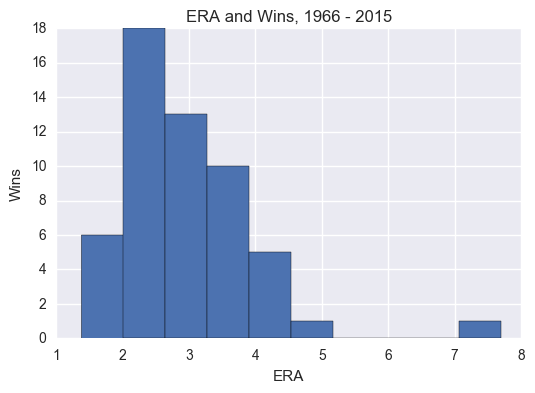

In [9]:
ERA_averages = pitchers.groupby('W').mean()['ERA']

%pylab inline
ERA_averages.hist()
pylab.title("ERA and Wins, 1966 - 2015")
pylab.xlabel("ERA")
pylab.ylabel("Wins")

The results above show that the pitchers than win the most games in a season have an ERA between 2.00 and 2.50. 

*However, why do pitchers that have an ERA of less than 2.00 suddenly win less games?*

Populating the interactive namespace from numpy and matplotlib


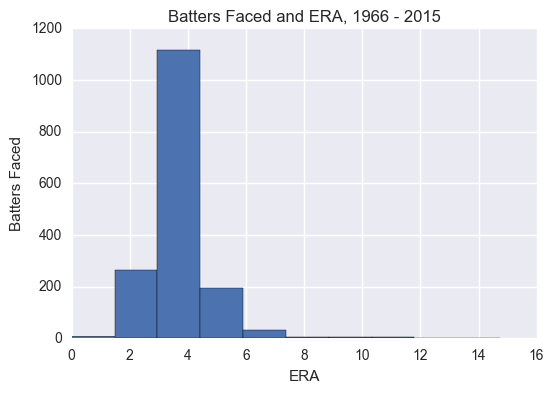

In [10]:
BattersFaced = pitchers.groupby('BFP').mean()['ERA']

%pylab inline
BattersFaced.hist()
pylab.title("Batters Faced and ERA, 1966 - 2015")
pylab.xlabel("ERA")
pylab.ylabel("Batters Faced")

When viewing the relationship between batters faced and ERA, we can see that pitchers with an ERA of less than 2 face far less batters. Essentially, they win less games because they are involved in less games.

So, lower ERA does generally lead to more wins. Is that enough value for a pitcher to receive a higher salary?

### Salary and ERA, 1966 - 2015

In [11]:
PayDay = PS.groupby(['ERA','salary'], as_index = False).mean()

Populating the interactive namespace from numpy and matplotlib


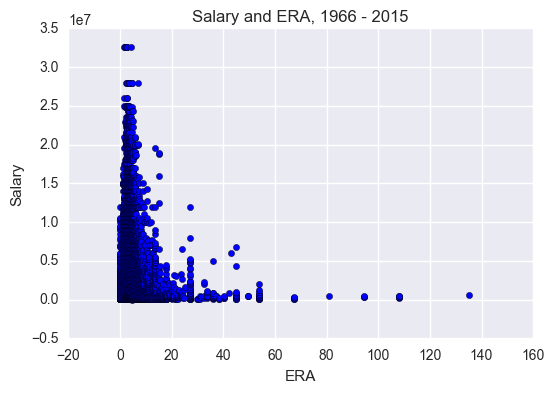

In [18]:
%pylab inline

plt.scatter(PayDay['ERA'], PayDay['salary'])
pylab.title("Salary and ERA, 1966 - 2015")
pylab.xlabel("ERA")
pylab.ylabel("Salary")

The graphic above shows that the lower ERA leads to a bigger pay day for pitchers. 

In conclusion, if a pitcher can consistently generate an ERA between 2.00 and 2.50 during a season, he will be able to give his team the best chance to win games. 

The dataset provided some challenges, as the date range was from 1966 - 2015. With rapid increase in player salary, the lower salaries from 1966, as an example, definitely influenced the information provided above. Also, some of the outliers also skewed the data. There were some entries missing, but we were fortunate enough where that information was not required for this type of analysis.